In [1]:
from dateutil.parser import parse
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
url1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url,error_bad_lines=False)
df1 = pd.read_csv(url1,error_bad_lines=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = df.drop(["Lat","Long"], axis=1)
df1 = df1.drop(["Lat","Long"], axis=1)

In [3]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,422,431,455,470,488,519,531,543,570,595,605,620,627,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910
2,NaN,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1558,1651,1702,1779,1821,1872,1936,1998,2067,2197,2323,2467,2546,2678,2841,2998,3058,3158,3271,3409,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297,6453
3,NaN,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,385,398,423,468,468,472,493,499,514,521,526,537,545,550,550,568,576,596,604,615,617,624,628,639,639,652,653,653,663,676,676,681,684,692,694,698,733,735,738,741
4,NaN,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,7,7,11,11,11,11,11,11,11,11,13,13,13,13,14,14,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,21


In [4]:
df1.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212
2,NaN,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935
3,NaN,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852
4,NaN,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86


In [0]:
df=df.melt(id_vars=["Province/State","Country/Region"], 
        var_name="Date", 
        value_name="Recoveries")

df1=df1.melt(id_vars=["Province/State","Country/Region"], 
        var_name="Date", 
        value_name="Global_Confirmed")

In [0]:
df.sort_values(by=['Country/Region','Province/State'], inplace=True)
df1.sort_values(by=['Country/Region','Province/State'], inplace=True)

In [0]:
df.rename(columns={'Province/State': 'Province_State'}, inplace=True)
df.rename(columns={'Country/Region': 'Country_Region'}, inplace=True)
df1.rename(columns={'Province/State': 'Province_State'}, inplace=True)
df1.rename(columns={'Country/Region': 'Country_Region'}, inplace=True)

In [0]:
df.Province_State.fillna("None", inplace=True)
df1.Province_State.fillna("None", inplace=True)

In [0]:
df['Date'] = pd.to_datetime(df['Date'])
df1['Date'] = pd.to_datetime(df1['Date'])

In [10]:
print("Number of Country_Region: ", df['Country_Region'].nunique())

Number of Country_Region:  188


In [11]:
print("Dates go from day", max(df['Date']), "to day", min(df['Date']), ", a total of", df['Date'].nunique(), "days")
print("Countries with Province/State informed: ", df.loc[df['Province_State']!='None']['Country_Region'].unique())

Dates go from day 2020-06-05 00:00:00 to day 2020-01-22 00:00:00 , a total of 136 days
Countries with Province/State informed:  ['Australia' 'China' 'Denmark' 'France' 'Netherlands' 'United Kingdom']


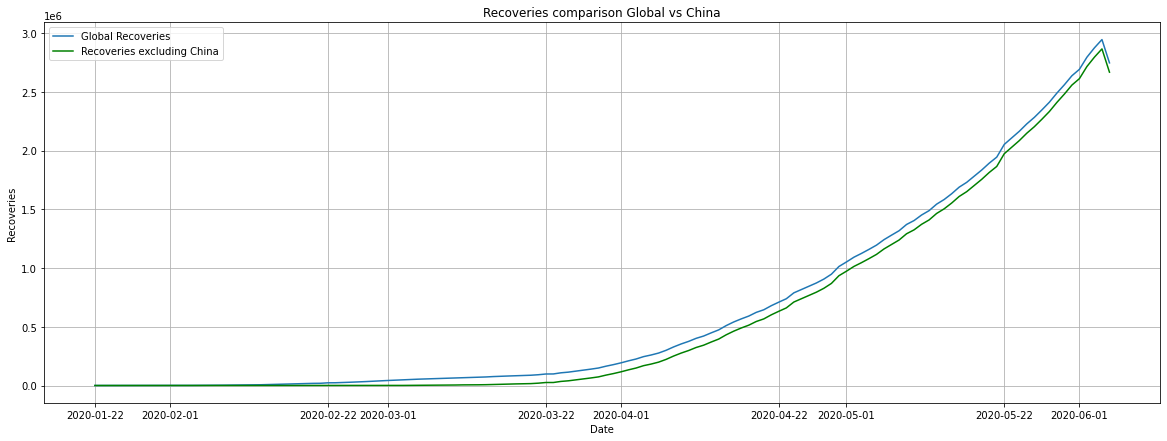

In [12]:
#A visual comparison of Global recoveries vs China
recoveries_total_date = df.groupby(['Date']).agg({'Recoveries':['sum']})
recoveries_total_date_noChina = df[df['Country_Region']!='China'].groupby(['Date']).agg({'Recoveries':['sum']})

plt.figure(figsize=(20,7))
plt.plot(recoveries_total_date, label='Global Recoveries')
plt.plot(recoveries_total_date_noChina, label='Recoveries excluding China',color = 'green')
plt.legend()
plt.grid()
plt.title('Recoveries comparison Global vs China')
plt.xlabel('Date')
plt.ylabel('Recoveries')
plt.show()

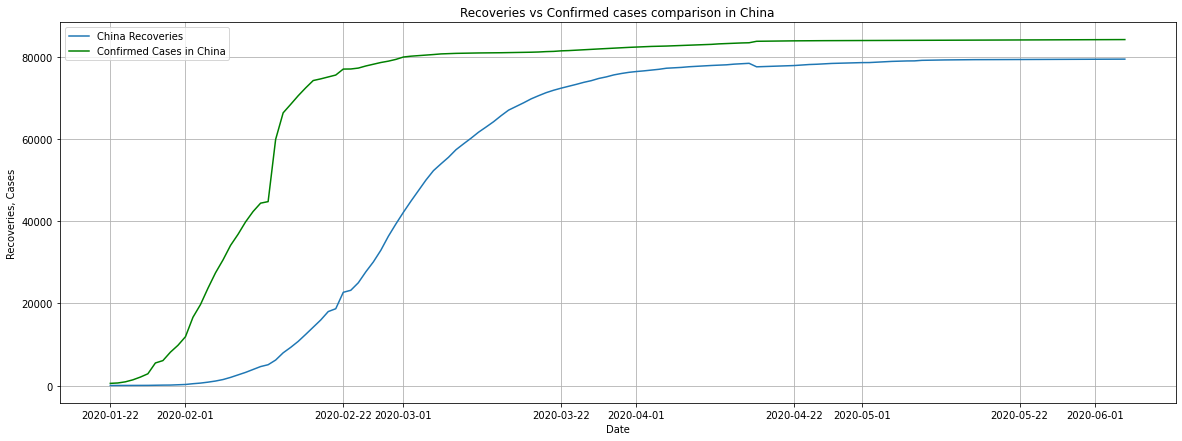

In [13]:
#Comparison of confirmed cases vs recoveries in China
recoveries_total_date_China = df[df['Country_Region']=='China'].groupby(['Date']).agg({'Recoveries':['sum']})
confirmed_total_date_China = df1[df1['Country_Region']=='China'].groupby(['Date']).agg({'Global_Confirmed':['sum']})

plt.figure(figsize=(20,7))
plt.plot(recoveries_total_date_China, label='China Recoveries')
plt.plot(confirmed_total_date_China, label='Confirmed Cases in China',color = 'green')
plt.legend()
plt.grid()
plt.title('Recoveries vs Confirmed cases comparison in China')
plt.xlabel('Date')
plt.ylabel('Recoveries, Cases')
plt.show()

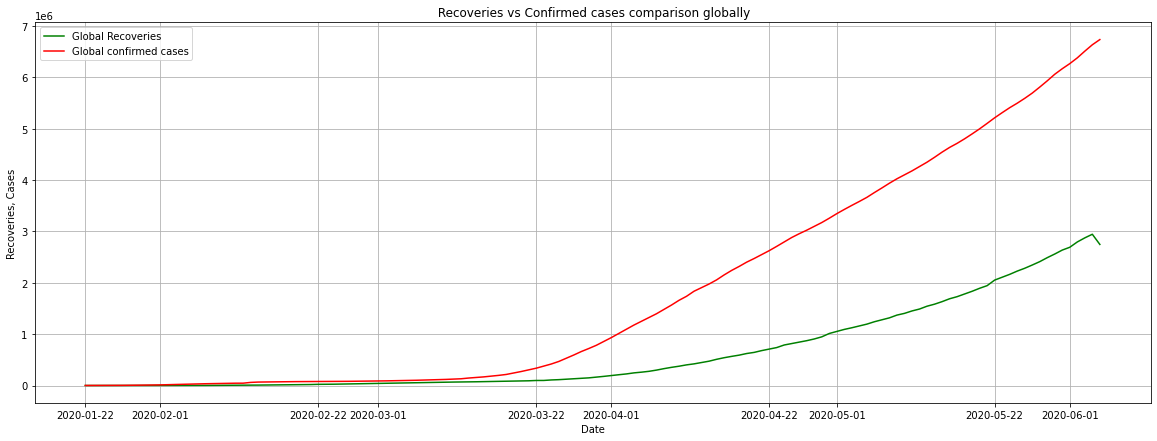

In [14]:
#Global cases vs recoveries comparison
confirmed_total_date = df1.groupby(['Date']).agg({'Global_Confirmed':['sum']})
plt.figure(figsize=(20,7))
plt.plot(recoveries_total_date, label='Global Recoveries', color = 'green')
plt.plot(confirmed_total_date, label='Global confirmed cases',color = 'red')
plt.legend()
plt.grid()
plt.title(' Recoveries vs Confirmed cases comparison globally')
plt.xlabel('Date')
plt.ylabel('Recoveries, Cases')
plt.show()

Text(0, 0.5, 'Cases/Recoveries')

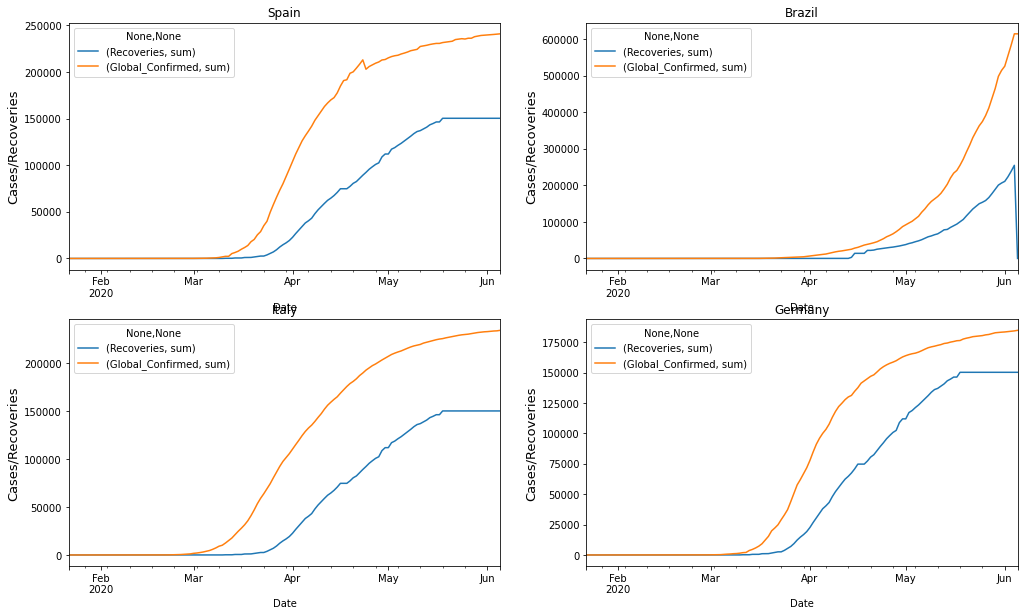

In [15]:
#Top LATAM/European countries cases vs recoveries comparison

#Spain
recoveries_total_date_Spain = df[df['Country_Region']=='Spain'].groupby(['Date']).agg({'Recoveries':['sum']})
confirmed_total_date_Spain = df1[df1['Country_Region']=='Spain'].groupby(['Date']).agg({'Global_Confirmed':['sum']})
total_date_Spain = recoveries_total_date_Spain.join(confirmed_total_date_Spain)

#Brazil
recoveries_total_date_UK = df[df['Country_Region']=='Brazil'].groupby(['Date']).agg({'Recoveries':['sum']})
confirmed_total_date_UK = df1[df1['Country_Region']=='Brazil'].groupby(['Date']).agg({'Global_Confirmed':['sum']})
total_date_UK = recoveries_total_date_UK.join(confirmed_total_date_UK)

#Italy
recoveries_total_date_Italy = df[df['Country_Region']=='Italy'].groupby(['Date']).agg({'Recoveries':['sum']})
confirmed_total_date_Italy = df1[df1['Country_Region']=='Italy'].groupby(['Date']).agg({'Global_Confirmed':['sum']})
total_date_Italy = recoveries_total_date_Spain.join(confirmed_total_date_Italy)

#Germany
recoveries_total_date_Germany = df[df['Country_Region']=='Germany'].groupby(['Date']).agg({'Recoveries':['sum']})
confirmed_total_date_Germany = df1[df1['Country_Region']=='Germany'].groupby(['Date']).agg({'Global_Confirmed':['sum']})
total_date_Germany = recoveries_total_date_Spain.join(confirmed_total_date_Germany)

plt.figure(figsize=(17,10))
plt.subplot(2, 2, 1)
total_date_Spain.plot(ax=plt.gca(), title='Spain')
plt.ylabel("Cases/Recoveries", size=13)

plt.subplot(2, 2, 2)
total_date_UK.plot(ax=plt.gca(), title='Brazil')
plt.ylabel("Cases/Recoveries", size=13)

plt.subplot(2, 2, 3)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Cases/Recoveries", size=13)

plt.subplot(2, 2, 4)
total_date_Germany.plot(ax=plt.gca(), title='Germany')
plt.ylabel("Cases/Recoveries", size=13)

In [0]:
#Creating subsets of the recoveries data to analyse recovery forecasting

recoveries_total_Spain = df[df['Country_Region']=='Spain']
recoveries_total_Brazil = df[df['Country_Region']=='Brazil']
recoveries_total_Italy = df[df['Country_Region']=='Italy']
recoveries_total_Germany = df[df['Country_Region']=='Germany']

In [17]:
recoveries_total_Spain.rename(columns={'Date': 'ds'}, inplace=True)
recoveries_total_Spain.rename(columns={'Recoveries': 'y'}, inplace=True)
recoveries_total_Brazil.rename(columns={'Date': 'ds'}, inplace=True)
recoveries_total_Brazil.rename(columns={'Recoveries': 'y'}, inplace=True)
recoveries_total_Italy.rename(columns={'Date': 'ds'}, inplace=True)
recoveries_total_Italy.rename(columns={'Recoveries': 'y'}, inplace=True)
recoveries_total_Germany.rename(columns={'Date': 'ds'}, inplace=True)
recoveries_total_Germany.rename(columns={'Recoveries': 'y'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
#Prophet model recovery prediction
from fbprophet import Prophet
#Spain
m = Prophet()
m.fit(recoveries_total_Spain)
future = m.make_future_dataframe(periods=365)

#Brazil
n = Prophet()
n.fit(recoveries_total_Brazil)
future1 = n.make_future_dataframe(periods=365)

#Italy
o = Prophet()
o.fit(recoveries_total_Italy)
future2 = o.make_future_dataframe(periods=365)

#Germany
p = Prophet()
p.fit(recoveries_total_Germany)
future3 = p.make_future_dataframe(periods=365)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast = m.predict(future)
forecast1 = n.predict(future1)
forecast2 = o.predict(future2)
forecast3 = p.predict(future3)

Text(619.9000000000254, 0.5, 'Recoveries')

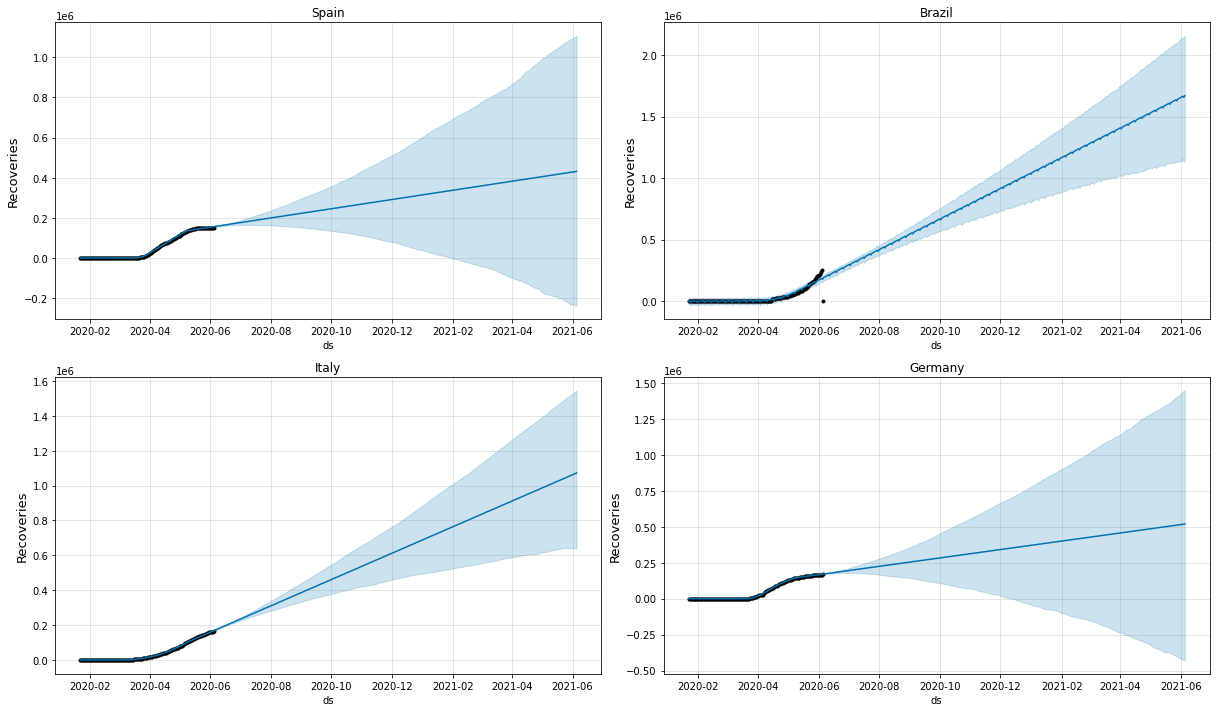

In [20]:
#Prophet Model forecast plots for below countries

plt.figure(figsize=(17,10))

#Spain
plt.subplot(2, 2, 1)
m.plot(forecast, ax=plt.gca())
plt.title("Spain")
plt.ylabel("Recoveries", size=13)

#Brazil
plt.subplot(2, 2, 2)
n.plot(forecast1, ax=plt.gca())
plt.title("Brazil")
plt.ylabel("Recoveries", size=13)

#Italy
plt.subplot(2, 2, 3)
o.plot(forecast2, ax=plt.gca())
plt.title("Italy")
plt.ylabel("Recoveries", size=13)

#Germany
plt.subplot(2, 2, 4)
p.plot(forecast3, ax=plt.gca())
plt.title("Germany")
plt.ylabel("Recoveries", size=13)

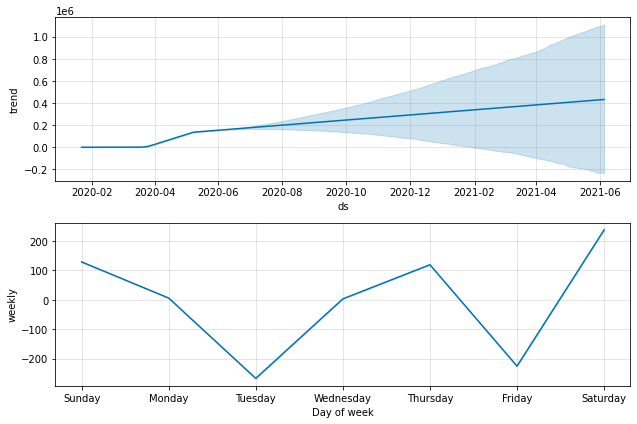

In [21]:
#Monthly and weekly trend of Covid-19 recoveries in Spain
fig1 = m.plot_components(forecast)

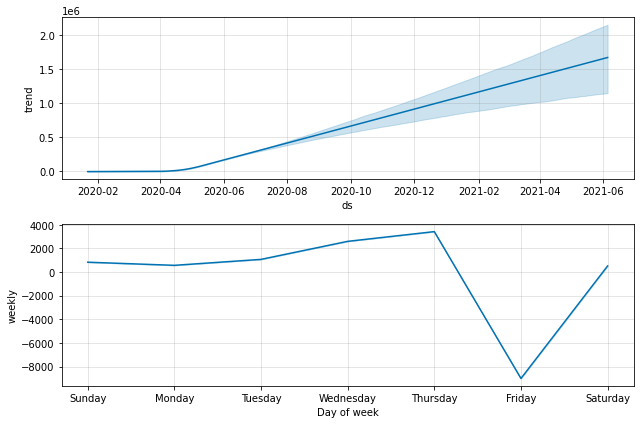

In [22]:
#Monthly and weekly trend of Covid-19 recoveries in Brazil
fig2 = n.plot_components(forecast1)

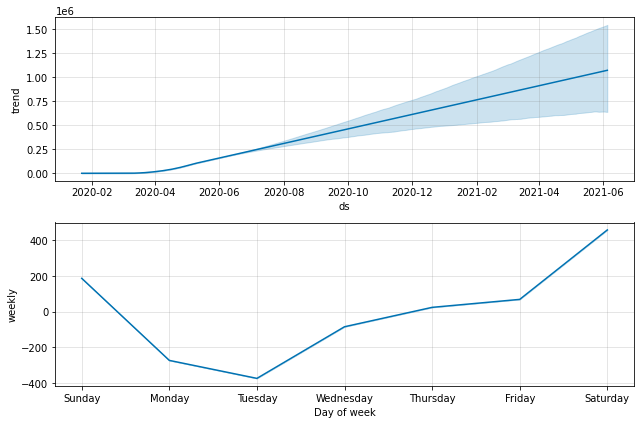

In [23]:
#Monthly and weekly trend of Covid-19 recoveries in Italy
fig2 = o.plot_components(forecast2)

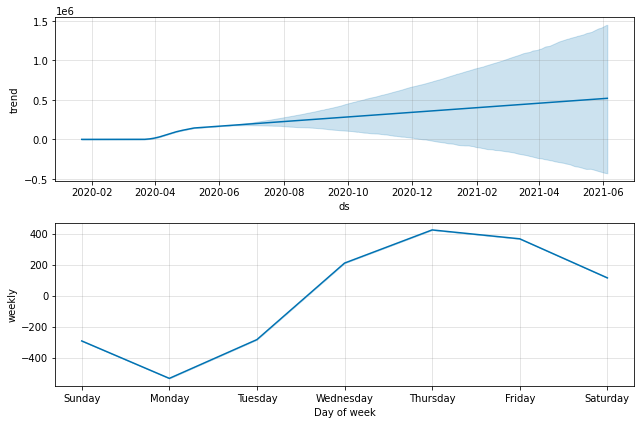

In [24]:
#Monthly and weekly trend of Covid-19 recoveries in Germany
fig4 = p.plot_components(forecast3)